# <center> 实验4：基于文档频率和互信息的中文文本特征词抽取实验</center>

## <center> 目录 </center>

[4.1 实验内容](#21)

[4.2 实验目的](#22)

[4.3 实验设备](#23)

[4.4 实验过程](#24)

[4.5 实验结果](#25)

[4.6 结果分析与结论](#26)

<a id="21"> </a>
## 4.1 实验内容

本实验利用特征选择算法从句子集中抽取具有最具代表性的 $N$ 个词作为特征集。

**实验任务：**

1. 基于文档频率 $DF$ 的特征选择方法完成中文文本特征词抽取
2. 基于互信息的特征选择方法完成中文文本特征词抽取

**主要流程：**

1. 从给定语料集中提取出句子进行预处理（分词、去除停用词），构建候选特征词集 $S$。
2. 对候选特征词集 $S$ 中的所有词汇 $w$，计算其特征得分 $s(w)$，计算方法分别使用文档频率、互信息两种方法实现。两种方法的计算公式如下所示：

**文档频率：**通过计算特征词条 $t$ 在各文档中出现的文档频率来完成提取。对所有词条计算其出现的文档频率，从大到小进行排序，取前 $K-K+N$ 个词语作为文本特征集合。

**互信息：**通过计算特征词条 $t$ 和类别 $c$ 之间的相关性来完成提取。

如果用 $A$ 表示包含特征词条 $t$ 且属于类别 $C$ 的文档频数， $B$ 为包含 $t$ 但是不属于 $C$ 的文档频数， $C$ 表示属于 $C$ 但不包含 $t$ 的文档频数， $N$ 表示语料中文档的总数，可构建如图1所示的矩阵形式， $t$ 和 $C$ 的互信息可由下式计算：

||C|~C|
|:--:|:--:|:--:|
|t|A|B|
|~t|C|D|

$$MI(t, c) \approx \lg \frac{A \times N}{(A+C) \times(A+B)}$$

计算各个类别下的互信息的平均值作为该词条的互信息值，计算公式为：

$$MI(t, C) = \lg \frac{1}{|C|} \sum_{c \in C} MI(t, c)$$

3. 依据候选特征词集 $S$ 中词汇 $w$ 的特征得分 $s(w)$进行排序，选择得分最大的前 $N=1000$ 个词作为文本的表示特征集。存储到文件当中。

该子任务利用特征选择算法从给定带有类别标签的句子集中抽取具有最具代表性的 $N$ 个词作为特征集。

**其它说明：**

1. 实验数据：使用谭松波整理的酒店评价语料（htl_del_4000）进行处理，所有数据已按照情感极性划分为褒(pos)贬(neg)两类，各2000篇，每个文本文件为一篇文章，实验数据需要先进行分词，分词方法不限。

2. 统计频数时按照篇章级共现进行计算。

3. 停用词表采用中文通用停用词表,文件名为“stopwords.txt”，可用于数据预处理中的去除停用词。

4. 文件存储格式要求：一行一个特征词，以utf-8进行编码。

<a id="22"> </a>
## 4.2 实验目的

加深对汉语文本信息处理基础理论及方法的认识和了解，锻炼和提高分析问题、解决问题的能力。通过对具体项目的任务分析、数据准备、算法设计和编码实现以及测试评价几个环节的练习，基本掌握实现一个自然语言处理系统的基本过程。

<a id="23"> </a>
## 4.3 实验设备

### 4.3.1 硬件
- 处理器：
- 内存：
- 硬盘空间：
- 显卡：

请在设备管理器中查看相关信息。或使用以下方式：

1. 使用组合键（win+R）打开“运行”窗口，在窗口中输入“dxdiag”,回车确定后查看相关信息。

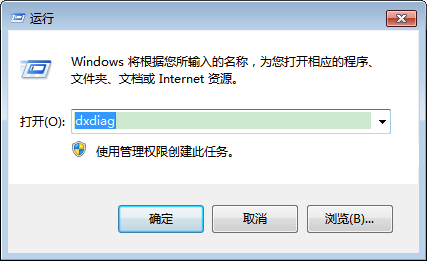

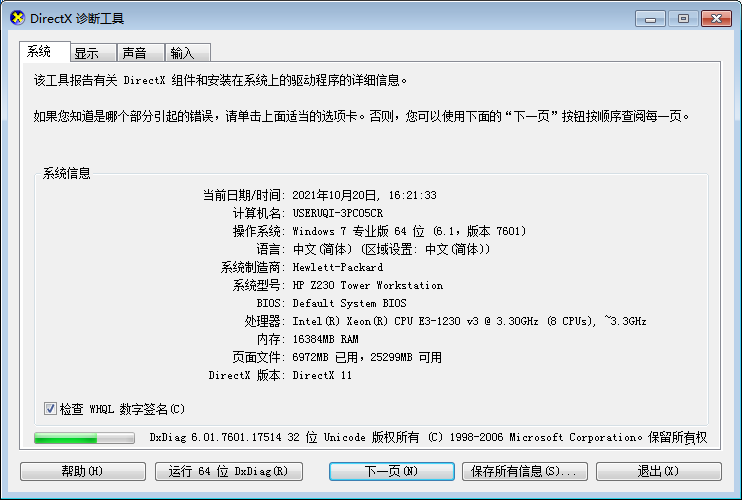

2. 使用组合键（win+R）打开“运行”窗口，在窗口中输入“devmgmt.msc”，打开设备管理器查看相关信息。

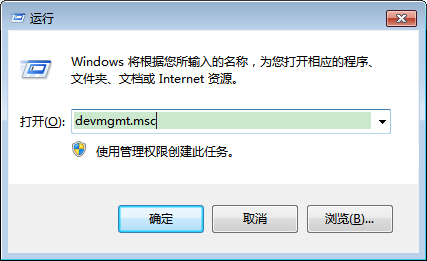
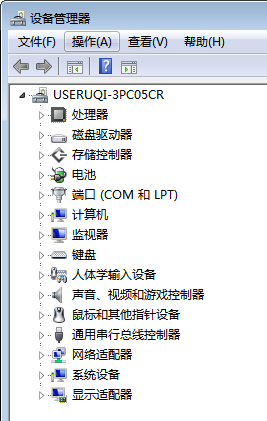

### 4.3.2 软件

- 操作系统：
- Python版本：
- 集成开发环境：
- 还以把各个第三方库的名称和版本号列入。

使用`conda info`或`conda list`查看相关名称及版本号

In [1]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
# conda info

In [3]:
# conda list

<a id="24"> </a>
## 4.4 实验过程

### 4.4.1 任务1： 基于文档频率的中文文本特征词抽取

导入第三方库、定义特征词词典

In [4]:
# 1. 基于词频的特征选择方法
import jieba
import os

dic={} #定义词库字典

定义文档频率抽取类DF

In [5]:
class DF:
    # 类初始化，读取停用词表
    def __init__(self):
        self.stop_words = set()
        content = open('./实验数据/stopwords.txt', 'r',encoding='utf-8').readlines()
        for sl in content:
            self.stop_words.add(sl)
            
    # 加载实验数据并完成切词操作
    def add_file(self, file_name):        
        if(os.path.exists(file_name)):
            content = open(file_name, 'r',encoding='utf-8').read()
            words = jieba.cut(content)
        else:
            return
        
        se = set()  # 临时字典集合
        for w in words:
            # 如果词语长度小于2或者读到停止词时不加入se集合
            if len(w.strip()) < 2 or w.lower() in self.stop_words:
                continue
            se.add(w)
            
        # 计算文档频率
        for i in se:
            dic[i]=dic.get(i,0.0)+1.0

完成特征词提取任务并输出为文件

In [6]:
if __name__ == "__main__":
    table = DF()                        #实例化文档频率抽取类DF
    p1 = './实验数据/htl_del_4000/neg'    # 正例
    p2 = './实验数据/htl_del_4000/pos'    # 反例
    numf1 = len([name for name in os.listdir(p1) if os.path.isfile(os.path.join(p1, name))]) + 1
    numf2 = len([name for name in os.listdir(p2) if os.path.isfile(os.path.join(p2, name))]) + 1

    #遍历所有文件
    l1=os.listdir(p1)#返回当前文件夹的文件列表
    l2=os.listdir(p2)#返回当前文件夹的文件列表
    
    for x in l1:
        fname= p1 + '/' + x
        table.add_file(fname)
    for x in l2:
        fname = p2 + '/' + x
        table.add_file(fname)
        
    for i in dic:
        dic[i]/=(len(l1) + len(l2))
        
    # reverse=True为按文档频率从大小到小排列
    list1=sorted(dic.items(),key=lambda s:s[1],reverse=True)
    
    # 输出文档频率的特征词文档
    with open("任务1：基于文档频率的特征词文档.txt", 'w+', encoding='utf-8') as f:
        for i in range(1000):
            f.write(list1[i][0] + '\n')
    print("任务1完成。")
    print("文档频率数据已保存在相对路径下，文件名：任务1：基于文档频率的特征词文档.txt")
    
    # 输出文档频率字典数据
#     with open("任务1：文档频率字典数据.txt", 'w+', encoding='utf-8') as f:
#         for i in dic.items():
#             f.write(str(i)+ '\n')
#     print("文档频率的字典数据已保存在相对路径下，文件名：任务1：文档频率字典数据.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built successfully.


任务1完成。
文档频率数据已保存在相对路径下，文件名：任务1：基于文档频率的特征词文档.txt


汇总代码：

In [5]:
# 1. 基于词频的特征选择方法
import jieba
import os

dic={} #定义词库字典

class DF:
    # 类初始化，读取停用词表
    def __init__(self):
        self.stop_words = set()
        content = open('./实验数据/stopwords.txt', 'r',encoding='utf-8').readlines()
        for sl in content:
            self.stop_words.add(sl)
            
    # 加载实验数据并完成切词操作
    def add_file(self, file_name):        
        if(os.path.exists(file_name)):
            content = open(file_name, 'r',encoding='utf-8').read()
            words = jieba.cut(content)
        else:
            return
        
        se = set()  # 临时字典集合
        for w in words:
            # 如果词语长度小于2或者读到停止词时不加入se集合
            if len(w.strip()) < 2 or w.lower() in self.stop_words:
                continue
            se.add(w)
            
        # 计算文档频率
        for i in se:
            dic[i]=dic.get(i,0.0)+1.0

if __name__ == "__main__":
    table = DF()                        #实例化文档频率抽取类DF
    p1 = './实验数据/htl_del_4000/neg'    # 正例
    p2 = './实验数据/htl_del_4000/pos'    # 反例
    numf1 = len([name for name in os.listdir(p1) if os.path.isfile(os.path.join(p1, name))]) + 1
    numf2 = len([name for name in os.listdir(p2) if os.path.isfile(os.path.join(p2, name))]) + 1

    #遍历所有文件
    l1=os.listdir(p1)#返回当前文件夹的文件列表
    l2=os.listdir(p2)#返回当前文件夹的文件列表
    
    for x in l1:
        fname= p1 + '/' + x
        table.add_file(fname)
    for x in l2:
        fname = p2 + '/' + x
        table.add_file(fname)
        
    for i in dic:
        dic[i]/=(len(l1) + len(l2))
        
    # reverse=True为按文档频率从大小到小排列
    list1=sorted(dic.items(),key=lambda s:s[1],reverse=True)
    
    # 输出文档频率的特征词文档
    with open("任务1：基于文档频率的特征词文档.txt", 'w+', encoding='utf-8') as f:
        for i in range(1000):
            f.write(list1[i][0] + '\n')
    print("任务1完成。")
    print("文档频率数据已保存在相对路径下，文件名：任务1：基于文档频率的特征词文档.txt")
    
    # 输出文档频率字典数据
#     with open("任务1：文档频率字典数据.txt", 'w+', encoding='utf-8') as f:
#         for i in dic.items():
#             f.write(str(i)+ '\n')
#     print("文档频率的字典数据已保存在相对路径下，文件名：任务1：文档频率字典数据.txt")   

任务1完成。
文档频率数据已保存在相对路径下，文件名：任务1：基于文档频率的特征词文档.txt


### 4.4.2 任务2： 基于互信息的中文文本特征词抽取

导入各种库，定义词汇词典

In [8]:
# 任务2： 基于互信息的中文文本特征词抽取

import math
import jieba
import os

# 定义全局字典
se_all=set()  # 所有词汇词典
dic_n={}      # 正例词汇词典
dic_p={}      # 反例词汇词典

定义互信息抽取类DF

In [9]:
class MI:
    def __init__(self):
        self.files = {}
        self.stop_words = set()
        content = open('./实验数据/stopwords.txt', 'r',encoding='utf-8').readlines()
        for line in content:
            self.stop_words.add(line)
            
    def add_file(self, file_name):
        # 加载实验数据并完成切词
        if(os.path.exists('./实验数据/htl_del_4000/'+ file_name)):
            content = open('./实验数据/htl_del_4000/'+ file_name, 'r',encoding='utf-8').read()
            words = jieba.cut(content)
        else:
            return
        
        # 建立字典
        if file_name[0] == "n":
            # 统计neg词汇
            se = set()
            for w in words:
                #如果词语长度小于2或者读到停止词
                if len(w.strip()) < 2 or w.lower() in self.stop_words:  
                    continue
                se.add(w)
                se_all.add(w)
            for i in se:
                dic_n[i]=dic_n.get(i,0.0)+1.0
        
        if file_name[0]=="p":
            # 统计pos词汇
            se=set()
            for w in words:
                if len(w.strip()) < 2 or w.lower() in self.stop_words:  #如果词语长度小于2或者读到停止词
                    continue
                se.add(w)
                se_all.add(w) #添加到所有词汇集合中
            for i in se:
                dic_p[i]=dic_p.get(i,0.0)+1.0

完成特征词提取任务并输出为文件

In [10]:
if __name__ == "__main__":
    dic_p_A = {}  # 包含词条且属于正例
    dic_p_B = {}  # 包含词条但不属于正例
    dic_p_C = {}  # 不包含词条但属于正例
    MI_p    = {}  # 互信息词典
    
    table = MI()  # 实验化MI类
    
    folder1 = './实验数据/htl_del_4000/neg'
    folder2 = './实验数据/htl_del_4000/pos'
    
    # 遍历所有文件
    l1=os.listdir(folder1)   # 返回neg文件夹中文件列表 
    l2=os.listdir(folder2)   # 返回pos文件夹中文件列表 
    
    for x in l1:
        # neg文件
        file_name = 'neg/' + x
        table.add_file(file_name)
        
    for x in l2:
        # pos文件
        file_name = 'pos/' + x
        table.add_file(file_name)
        
    # 计算 pos 的 A、B和A+C
    for i in se_all:
        if i in dic_p:
            # A
            dic_p_A[i]=dic_p[i]   #包含特征词条t和类别pos的文档频数
        else:
            dic_p_A[i]=1
            
        if i in dic_n:
            # B
            dic_p_B[i]=dic_n[i]
        else:
            dic_p_B[i]=1
            
        #A+C
        dic_p_C[i]= len(l2) - dic_p_A[i]
        
    for i in se_all:
        MI_p[i]=math.log10(dic_p_A[i] * (len(l2) + len(l1)) / (dic_p_C[i] + dic_p_A[i]) / (dic_p_A[i] + dic_p_B[i]))
    list1 = sorted(MI_p, key=lambda d: d[1], reverse=True)
    
    with open("任务2：基于互信息的特征词文档.txt", 'w+', encoding='utf-8') as f:
        for i in range(0, 1000):
            f.write(list1[i] + '\n')
    print("任务2完成。")
    print("基于互信息的特征词文档已保存在相对路径下，文件名：任务2：基于互信息的特征词文档.txt")

任务2完成。
基于互信息的特征词文档已保存在相对路径下，文件名：任务2：基于互信息的特征词文档.txt


汇总代码：

In [4]:
# 任务2： 基于互信息的中文文本特征词抽取

import math
import jieba
import os

# 定义全局字典
se_all=set()  # 所有词汇词典
dic_n={}      # 正例词汇词典
dic_p={}      # 反例词汇词典


class MI:
    def __init__(self):
        self.files = {}
        self.stop_words = set()
        content = open('./实验数据/stopwords.txt', 'r',encoding='utf-8').readlines()
        for line in content:
            self.stop_words.add(line)
            
    def add_file(self, file_name):
        # 加载实验数据并完成切词
        if(os.path.exists('./实验数据/htl_del_4000/'+ file_name)):
            content = open('./实验数据/htl_del_4000/'+ file_name, 'r',encoding='utf-8').read()
            words = jieba.cut(content)
        else:
            return
        
        # 建立字典
        if file_name[0] == "n":
            # 统计neg词汇
            se = set()
            for w in words:
                #如果词语长度小于2或者读到停止词
                if len(w.strip()) < 2 or w.lower() in self.stop_words:  
                    continue
                se.add(w)
                se_all.add(w)
            for i in se:
                dic_n[i]=dic_n.get(i,0.0)+1.0
        
        if file_name[0]=="p":
            # 统计pos词汇
            se=set()
            for w in words:
                if len(w.strip()) < 2 or w.lower() in self.stop_words:  #如果词语长度小于2或者读到停止词
                    continue
                se.add(w)
                se_all.add(w) #添加到所有词汇集合中
            for i in se:
                dic_p[i]=dic_p.get(i,0.0)+1.0

if __name__ == "__main__":
    dic_p_A = {}  # 包含词条且属于正例
    dic_p_B = {}  # 包含词条但不属于正例
    dic_p_C = {}  # 不包含词条但属于正例

    MI_p    = {}  # 互信息词典
    
    table = MI()  # 实验化MI类
    
    folder1 = './实验数据/htl_del_4000/neg'
    folder2 = './实验数据/htl_del_4000/pos'
    
    # 遍历所有文件
    l1=os.listdir(folder1)   # 返回neg文件夹中文件列表 
    l2=os.listdir(folder2)   # 返回pos文件夹中文件列表 
    
    for x in l1:
        # neg文件
        file_name = 'neg/' + x
        table.add_file(file_name)
        
    for x in l2:
        # pos文件
        file_name = 'pos/' + x
        table.add_file(file_name)
        
    # 计算 pos 的 A、B和A+C
    for i in se_all:
        if i in dic_p:
            # A
            dic_p_A[i]=dic_p[i]   #包含特征词条t和类别pos的文档频数
        else:
            dic_p_A[i]=1
            
        if i in dic_n:
            # B
            dic_p_B[i]=dic_n[i]
        else:
            dic_p_B[i]=1
            
        #A+C
        dic_p_C[i]= len(l2) - dic_p_A[i]
        
    for i in se_all:
        MI_p[i]=math.log10(dic_p_A[i] * (len(l2) + len(l1)) / (dic_p_C[i] + dic_p_A[i]) / (dic_p_A[i] + dic_p_B[i]))
    list1 = sorted(MI_p, key=lambda d: d[1], reverse=True)
    
    with open("任务2：基于互信息的特征词文档.txt", 'w+', encoding='utf-8') as f:
        for i in range(0, 1000):
            f.write(list1[i] + '\n')
    print("任务2完成。")
    print("基于互信息的特征词文档已保存在相对路径下，文件名：任务2：基于互信息的特征词文档.txt")

任务2完成。
基于互信息的特征词文档已保存在相对路径下，文件名：任务2：基于互信息的特征词文档.txt


<a id="25"> </a>
## 4.5 实验结果

对4.4节两个实验的结果进行描述。

<a id="26"> </a>
## 4.6 结果分析与结论

对实验结果进行分析和总结，得出结论。